In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
bench = 'fast2'
minN = 1
maxN = 21

In [23]:
def readTimingsFile(num, base):
    res = []
    file = open('./data/' + base + '/' + str(num) + '/operator-timings-filtered.txt', encoding="utf8").read()
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        res.append([num, str(splitLine[1]), int(splitLine[2]), int(splitLine[3])])
    return res

results = []
for i in range(minN, maxN):
    results.append(readTimingsFile(i, bench))

In [24]:
eventMap = {
    "markedNext": "A",
    "phaseOutCompleted": "C",
    "activeObjectsCreated": "D",
    "markedActive": "B"
}

shortToEventDescrMap = {
    "A": "Marked as next",
    "C": "Fully phased out",
    "D": "All objects created",
    "B": "Marked as active"
}
shortToEventMap = {v: k for k, v in eventMap.items()}

events = [f"Revision {x[2]}: {eventMap[x[1]]}" for x in results[0]]
timings = []
for i in range(len(results)):
    timings.append([x[3] for x in results[i]])

In [25]:
print(events)
print(timings)

['Revision 1: D', 'Revision 2: A', 'Revision 2: B', 'Revision 1: C', 'Revision 2: D']
[[1639141810311830966, 1639141865641367495, 1639141865869462770, 1639141866041552382, 1639141866248253174], [1639142032713669762, 1639142088193615874, 1639142088484026762, 1639142088739620150, 1639142088743378125], [1639142273087775059, 1639142331781774675, 1639142332066318577, 1639142332157191502, 1639142332291143561], [1639142513195819261, 1639142567742165697, 1639142567953179220, 1639142568110846487, 1639142568250432496], [1639149441884040060, 1639149495403491395, 1639149495780098575, 1639149496565454130, 1639149496858324461], [1639144403666921972, 1639144457445227041, 1639144457636837544, 1639144457831600760, 1639144457972791756], [1639144623136189770, 1639144676576306396, 1639144676992812452, 1639144677569383145, 1639144677822394200], [1639144862344328602, 1639144916896207317, 1639144917172432930, 1639144917856563903, 1639144917860293407], [1639145102077912402, 1639145155161725119, 16391451555326

In [26]:
def getUserUpgradeTiming(num, base):
    file = open('./data/' + base + '/' + str(num) + '/user-timings.txt', encoding="utf8").read()
    return int(file.split('\n')[0])

for i in range(minN, maxN):
    timings[i - 1][0] = getUserUpgradeTiming(i, bench)

events[0] = "Upgrade Requested"

In [27]:
print(timings)

[[1639141864783, 1639141865641367495, 1639141865869462770, 1639141866041552382, 1639141866248253174], [1639142087347, 1639142088193615874, 1639142088484026762, 1639142088739620150, 1639142088743378125], [1639142326393, 1639142331781774675, 1639142332066318577, 1639142332157191502, 1639142332291143561], [1639142566868, 1639142567742165697, 1639142567953179220, 1639142568110846487, 1639142568250432496], [1639149494445, 1639149495403491395, 1639149495780098575, 1639149496565454130, 1639149496858324461], [1639144456439, 1639144457445227041, 1639144457636837544, 1639144457831600760, 1639144457972791756], [1639144675759, 1639144676576306396, 1639144676992812452, 1639144677569383145, 1639144677822394200], [1639144915303, 1639144916896207317, 1639144917172432930, 1639144917856563903, 1639144917860293407], [1639145154273, 1639145155161725119, 1639145155532685028, 1639145156150306387, 1639145156603408481], [1639145398752, 1639145399651692382, 1639145399893330436, 1639145400239326161, 16391454008

In [28]:
initNanos = []
for i in range(len(timings)):
    initNano = timings[i][0] * (10 ** 6)
    initNanos.append(initNano)
    timings[i][0] = 0
    for j in range(1, len(timings[i])):
        timings[i][j] = (timings[i][j] - initNano) / (10 ** 9)

In [29]:
print(timings)

[[0, 0.858367495, 1.08646277, 1.258552382, 1.465253174], [0, 0.846615874, 1.137026762, 1.39262015, 1.396378125], [0, 5.388774675, 5.673318577, 5.764191502, 5.898143561], [0, 0.874165697, 1.08517922, 1.242846487, 1.382432496], [0, 0.958491395, 1.335098575, 2.12045413, 2.413324461], [0, 1.006227041, 1.197837544, 1.39260076, 1.533791756], [0, 0.817306396, 1.233812452, 1.810383145, 2.0633942], [0, 1.593207317, 1.86943293, 2.553563903, 2.557293407], [0, 0.888725119, 1.259685028, 1.877306387, 2.330408481], [0, 0.899692382, 1.141330436, 1.487326161, 2.11822818], [0, 1.096362836, 1.364642038, 1.53336689, 1.657085836], [0, 0.876323131, 1.271272483, 1.456002586, 1.771841366], [0, 0.868373055, 1.17890449, 1.740422062, 2.039300511], [0, 0.902627545, 1.32718423, 1.77671079, 2.037870125], [0, 0.855041445, 1.087958792, 1.246688612, 1.325161951], [0, 0.936676072, 1.306253906, 1.86352494, 1.867566057], [0, 1.195889986, 1.505045793, 1.763019571, 2.26684571], [0, 1.003932534, 1.254374291, 1.459913198, 1.

In [30]:
from statistics import mean

avgTimings = [float(sum(col))/len(col) for col in zip(*timings)]

In [31]:
print(avgTimings)

[0.0, 1.1875488137, 1.4810124572, 1.8249012762999999, 2.0477237648999997]


In [32]:
def getMessageTimings(num, base):
    file = open('./data/' + base + '/' + str(num) + '/message-timings.txt', encoding="utf8").read()
    res = []
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        res.append([int(splitLine[0]), int(splitLine[3])])
    return res


In [33]:
import sys
import math
# Find line segment x-values
# Blue -> Rev 1
# Orange -> both processing
# Red -> No revision processing
# Green -> Rev 2 processing
def findExtremes(revNum, userTimings):
    minEnd = sys.maxsize
    maxEnd = ~sys.maxsize
    for entry in userTimings:
        if entry[0] != revNum:
            continue
        minEnd = min(minEnd, entry[1])
        maxEnd = max(maxEnd, entry[1])
    return minEnd, maxEnd


def toSecondsFromBegin(timeNano, beginNano):
    return (timeNano - beginNano) / (10 ** 9)

revProcessingTransTimings = []
for i in range(minN, maxN):
    userTimings = getMessageTimings(i, bench)
    first1, last1 = findExtremes(1, userTimings)
    first2, last2 = findExtremes(2, userTimings)

    first1 = 0 # fit to graph
    # convert to seconds from begin
    initNano = initNanos[i - 1]
    last1 = toSecondsFromBegin(last1, initNano) 
    first2 = toSecondsFromBegin(first2, initNano)
    last2 = toSecondsFromBegin(last2, initNano)
    revProcessingTransTimings.append([first1, last1, first2, last2])

In [34]:
print(revProcessingTransTimings)

[[0, 1.170323401, 11.621527043, 61.157068132], [0, 2.276383169, 11.941770797, 60.980156385], [0, 6.816088928, 16.936097247, 65.592019939], [0, 2.634281517, 11.510637581, 61.151259883], [0, 0.980820287, 12.954533271, 61.178635067], [0, 2.209218856, 12.6569172, 61.189211206], [0, 0.940583131, 12.895436316, 65.089732452], [0, 1.690058739, 13.114427898, 61.515454466], [0, 0.961519864, 12.508298626, 60.971778852], [0, 1.130189226, 13.282683232, 61.063470379], [0, 1.33600683, 12.264921868, 61.275093515], [0, 1.154381143, 12.684876129, 65.410600189], [0, 1.131501473, 12.623211502, 61.153288899], [0, 1.081829956, 12.573028694, 61.01962518], [0, 1.071562632, 12.701277285, 61.273301347], [0, 1.074751134, 13.603214149, 61.037056931], [0, 1.394384264, 12.882142482, 61.819485882], [0, 1.41542579, 13.385407708, 61.067313424], [0, 2.12991609, 11.726636154, 61.082038009], [0, 2.346230443, 12.043174932, 61.144350805]]


In [35]:
avgProcessingTransTimings = [float(sum(col))/len(col) for col in zip(*revProcessingTransTimings)]

In [36]:
print(avgProcessingTransTimings)

[0.0, 1.7472728436499998, 12.7955110057, 61.8085470471]


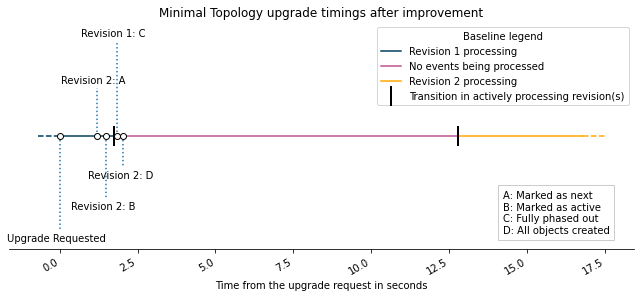

In [37]:
levels = np.tile([-1, 0.5, -0.66, 1, -0.33, 1],
                 int(np.ceil(len(events)/6)))[:len(events)]

fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Minimal Topology upgrade timings after improvement")

markerline, stemline, baseline = ax.stem(avgTimings, levels,
                                         linefmt=":", basefmt="k-", 
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(avgTimings)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(avgTimings, levels, events, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center")


plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

baseline.set_visible(False)
baseY = baseline.get_ydata()[0]
baseYs = [baseY, baseY]
xRev1 = [0, avgProcessingTransTimings[1]]
xNone = [avgProcessingTransTimings[1], avgProcessingTransTimings[2]]
xRev2 = [avgProcessingTransTimings[2], avgProcessingTransTimings[3] - 45]

# add colored baselines
pFirst = plt.plot(xRev1, baseYs, '#003f5c', label="Revision 1 processing")
plt.plot(xNone, baseYs, '#bc5090', label="No events being processed")
pLast = plt.plot(xRev2, baseYs, '#ffa600', label="Revision 2 processing")
# add ends of baseline
plt.plot([-0.7, 0], baseYs, '--', color=pFirst[0].get_color())
plt.plot([xRev2[1], xRev2[1] + 0.7], baseYs, '--', color=pLast[0].get_color())

# plot transition markers
plt.plot([avgProcessingTransTimings[1]], [baseY], marker="|", color='white', markersize=20, markeredgecolor='black', mew=2, label='Transition in actively processing revision(s)')
plt.plot([avgProcessingTransTimings[2]], [baseY], marker="|", color='white', markersize=20, markeredgecolor='black', mew=2)


plt.legend(loc="upper right", title="Baseline legend")
legendStr = ""
for k in sorted(shortToEventDescrMap):
    legendStr += f'{k}: {shortToEventDescrMap[k]}\n'
legendStr = legendStr[:-1]
ax.text(0.79,0.07, legendStr ,transform=ax.transAxes, bbox=dict(facecolor='none',edgecolor='black',boxstyle='square,pad=0.5', alpha=0.2)) 
ax.margins(y=0.1)
plt.xlabel("Time from the upgrade request in seconds")  
plt.savefig('eval-upgrade-improv.pdf')
plt.show()

In [38]:
def readDetailedMessageTimings(base, num):
    res = []
    file = open('./data/' + base + '/' + str(num) + '/message-timings.txt', encoding="utf8").read()
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        res.append([num, int(splitLine[0]), int(splitLine[1]), int(splitLine[2]), int(splitLine[3]), float(splitLine[4])])
    return res

messTimingsDetailed = []
for i in range(1, 21):
    messTimingsDetailed = messTimingsDetailed + readDetailedMessageTimings('fast', i)

In [39]:
import pandas as pd
df = pd.DataFrame(messTimingsDetailed, columns=['benchNum', 'version', 'id', 'beginTime', 'endTime', 'latency'])

In [40]:
firstMsgLatencies = []
df_filtered = []
for i in range(1, 21):
    # ensure no duplicates and no lost message (i.e. checking for duplicate IDs, missing IDs)
    df_bench = df[df['benchNum'] == i].reset_index()
    msg_ids = df_bench['id']
    msg_ids = msg_ids.sort_values(ascending=True).values
    for j in range(1, len(msg_ids)):
        if msg_ids[j] == msg_ids[j - 1]:
            print("DUPLICATE FOUND")
        elif msg_ids[j] > (msg_ids[j-1] + 1):
            print("MESSAGE(s) LOST")